# Part 1 Experiment design

AirBnB management have asked the Data Science team to analyse the impact of the professional photography service in order to determine whether or not they should continue funding the service.
Provide full details about how you will run experiments to assess the impact of this service on both hosts and guests. How will you ensure that the experiments are valid and not biased?

## 1.1 How I would run the experiment

I would run several A/B tests using t-test and p-value evaluation. https://en.wikipedia.org/wiki/A/B_testing
  
I would consider a sample of size 100 properties of witch 50 would be my test (ads with professional pictures) and 50 my control samples (ads with host phone pictures). I would divide by 2 the time I have to run the experiment, and I would swap the test and control samples.

In the exercise text is not specified the time and resources I have to run the experiments. Therefore I will mark with * the high priority KPI. The other metrics are optional.

***variables and marketing KPI to evaluate the `host` and `guest` impact:***    
  
    1.Booking conversion rate *  [host, guest]  
    2.Occupancy rate * [host]  
    3.Web traffic or Click Through Rate (CTR) * [host]  
    4.returning visitors [host, guest]  
    5.unique visitors [host, guest]  
    6.host avg reveniew [host]  
    7.number of messages sent to host [host, guest]  
    8.Average Time on Page[host, guest]  
    9.sentiment analysis of the reviews [host, guest]: I expect that a guest is more satisfied if he has selected the booking represented by professional and more realistic pictures.    

***Performance data by time***
I would propose 90 days time period.  

***Performance data by region****
I would run different experiments with Samples coming from different kind of locations: different states, urban and country areas.   

***Performance data by type of booking****
I would run different experiments considering only luxury or cheap booking. I expect that a guest is more willing to spend money on a luxury property if it is represented by professional pictures.  


sources:https://www.airbnb.co.uk/help/article/2500/how-do-i-track-my-hosting-performance?_set_bev_on_new_domain=1586578155_NDQwZmIxYjMyNjdj
https://www.klipfolio.com/resources/kpi-examples/digital-marketing

(*)I would run these experiments only if I had enough time and resources

## 1.2 How I would ensure that the experiments are valid and not biased

bias is the fact that information is not correct because of the method used in collecting or presenting it.
In A/B testing experiment, bias could happen in 3 moments: Pre-trial, during-trial and after trial.
  
***Pre-Trial Bias ***
     
Selection bias: If I am not running a specific experiment I should make sure that both test and control samples of properties and host I am including are homogeneus (both come from different geographical areas and from different types (cheap, normal, luxury)) 

Channeling bias:I must make sure that all the ads pictures from test sample are professional pictures and all the control sample are pictures taken by host.

***Bias during trial***
  
Chronology bias: I should monitor the same time period for test and control samples. I could monitor just the working days in order to avoid the holydays bias on my outcome.  

Recall bias: my data source (airBnB website) and metrics should be all objective.  

Transfer bias: I should make sure that the hosts will continue their activity during all the experiment period.  

Exposure Misclassification: frequency of errors should be approximately the same in the groups being compared   

Outcome Misclassification: all subjects should be correctly classified with respect to outcome. I should clarely and objectively define the two classes (professional and host pictures) in order to avoid misclassification errors.

Performance Bias: if possible, I should run more tests in order to consider separately the different geographical areas, guests types, properties types.  I should make sure that the result is not affected by unpleasant guest experience due to longer waiting time due to the loading of high resolution professional pictures.

***Bias after trial***
  
Citation Bias: I should not consider the benefits as more relevant than the neutral or negative outcames.
  
Confounding: I should be careful that the results I obtain are not influenced by other factors(like particular  holidays, the strategic position of the property ) that picture quality.

source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2917255/

# Part 2  Result analysis

In [148]:
import pandas as pd
import numpy as np
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

In [149]:
data=pd.read_json('./data/intervals_challenge.json',lines=True)

## 2.1 Exploring the database

The database incledes the following columns:

type: can be going_to_pickup, waiting_for_rider or driving_to_destination.
trip_id: uniquely identifies the trip.
duration: how long the interval last, in seconds.
distance: how far the vehicle moved in this interval, in meters.
city_id: either bravos, pentos and volantis.
started_at: when the interval started, UTC Time.
vehicle_id: uniquely identifies the vehicle.


In [150]:
data.columns

Index(['duration', 'distance', 'started_at', 'trip_id', 'vehicle_id',
       'city_id', 'type'],
      dtype='object')

In [151]:
data.head()

,duration,distance,started_at,trip_id,vehicle_id,city_id,type
0,857,5384,2016-10-03 13:00:00.286999941,c00cee6963e0dc66e50e271239426914,52d38cf1a3240d5cbdcf730f2d9a47d6,pentos,driving_to_destination
1,245,1248,2016-10-03 13:00:00.852999926,427425e1f4318ca2461168bdd6e4fcbd,8336b28f24c3e7a1e3d582073b164895,volantis,going_to_pickup
2,1249,5847,2016-10-03 13:00:01.670000076,757867f6d7c00ef92a65bfaa3895943f,8885c59374cc539163e83f01ed59fd16,pentos,driving_to_destination
3,471,2585,2016-10-03 13:00:01.841000080,d09d1301d361f7359d0d936557d10f89,81b63920454f70b6755a494e3b28b3a7,bravos,going_to_pickup
4,182,743,2016-10-03 13:00:01.970000029,00f20a701f0ec2519353ef3ffaf75068,b73030977cbad61c9db55418909864fa,pentos,going_to_pickup


In [152]:
#data types
data.dtypes

duration              object
distance              object
started_at    datetime64[ns]
trip_id               object
vehicle_id            object
city_id               object
type                  object
dtype: object

In [153]:
#null values
data.isnull().sum()

duration      0
distance      0
started_at    0
trip_id       0
vehicle_id    0
city_id       0
type          0
dtype: int64

## 2.2 Database Cleaning

In order to perform an A/B test, and gain more information, I need to:  
1.check the unique values of categorical columns  
2.perform some engineering operations to the columns of the database:  
    -`duration` and `distance` should be of type integer
    -`started_at` can be split in year-month-day-hour

In [154]:
#column type
data['type'].value_counts()


going_to_pickup           58510
waiting_for_rider         53746
driving_to_destination    52914
Name: type, dtype: int64

I have different numbers for the 3 labels. This means that I don't have complete sequence going-to-pickup-waiting-for-rider-driving-to-destination. In this case I should keep just the 'going_to_pickup' and 'driving to destination' data and treat them as separate data.

In [155]:
#column city_id
data['city_id'].value_counts()

pentos      113684
volantis     35611
bravos       15875
Name: city_id, dtype: int64

Most of the dataset comes from Pentos rides. Bravo is the least represented.

In [156]:
#splitting column started_at in year-month-day-hour
def extract_date(df,col):
    df[col+'_year']=df[col].apply(lambda x : x.year)
    df[col+'_month']=df[col].apply(lambda x : x.month)
    df[col+'_day']=df[col].apply(lambda x : x.day)
    df[col+'_hour']=df[col].apply(lambda x : x.hour)
extract_date(data,'started_at') 
data.head()

,duration,distance,started_at,trip_id,vehicle_id,city_id,type,started_at_year,started_at_month,started_at_day,started_at_hour
0,857,5384,2016-10-03 13:00:00.286999941,c00cee6963e0dc66e50e271239426914,52d38cf1a3240d5cbdcf730f2d9a47d6,pentos,driving_to_destination,2016,10,3,13
1,245,1248,2016-10-03 13:00:00.852999926,427425e1f4318ca2461168bdd6e4fcbd,8336b28f24c3e7a1e3d582073b164895,volantis,going_to_pickup,2016,10,3,13
2,1249,5847,2016-10-03 13:00:01.670000076,757867f6d7c00ef92a65bfaa3895943f,8885c59374cc539163e83f01ed59fd16,pentos,driving_to_destination,2016,10,3,13
3,471,2585,2016-10-03 13:00:01.841000080,d09d1301d361f7359d0d936557d10f89,81b63920454f70b6755a494e3b28b3a7,bravos,going_to_pickup,2016,10,3,13
4,182,743,2016-10-03 13:00:01.970000029,00f20a701f0ec2519353ef3ffaf75068,b73030977cbad61c9db55418909864fa,pentos,going_to_pickup,2016,10,3,13


In [157]:
data['started_at_year'].unique()

array([2016])

In [158]:
data['started_at_month'].unique()

array([10])

In [159]:
data['started_at_day'].unique()

array([3, 4])

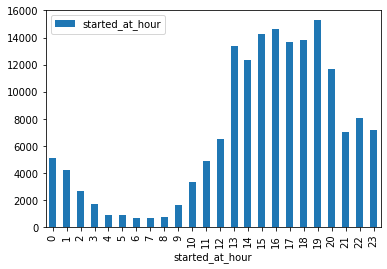

In [160]:
df = data.sort_values(['started_at_hour'])
data.groupby(['started_at_hour']).agg({'started_at_hour':'count'}).plot.bar()

We can see that the database contains only data from of 3-4 of October 2016. Most of the rides are day-rides:(13-20)

In [161]:
#column distance: to int type
filter1=pd.to_numeric(data['distance'], errors='coerce').isnull()
df=data[~filter1]
df = df.astype({"distance": int})
df.dtypes

duration                    object
distance                     int64
started_at          datetime64[ns]
trip_id                     object
vehicle_id                  object
city_id                     object
type                        object
started_at_year              int64
started_at_month             int64
started_at_day               int64
started_at_hour              int64
dtype: object

In [162]:
#column duration: to int type
filter1=pd.to_numeric(df['duration'], errors='coerce').isnull()
df_clean=df[~filter1]
df_clean = df_clean.astype({"duration": int})
df_clean.dtypes

duration                     int64
distance                     int64
started_at          datetime64[ns]
trip_id                     object
vehicle_id                  object
city_id                     object
type                        object
started_at_year              int64
started_at_month             int64
started_at_day               int64
started_at_hour              int64
dtype: object

In [163]:
#check for outliars in numerical columns
df_clean._get_numeric_data().describe()

,duration,distance,started_at_year,started_at_month,started_at_day,started_at_hour
count,164013.000000,1.640130e+05,164013.0,164013.0,164013.000000,164013.000000
mean,432.959534,1.944164e+03,2016.0,10.0,3.548847,15.135331
std,559.097970,7.230917e+03,0.0,0.0,0.497610,5.599166
min,0.000000,0.000000e+00,2016.0,10.0,3.000000,0.000000
25%,55.000000,1.900000e+01,2016.0,10.0,3.000000,13.000000
50%,246.000000,6.080000e+02,2016.0,10.0,4.000000,16.000000
75%,616.000000,2.349000e+03,2016.0,10.0,4.000000,19.000000
max,48654.000000,1.218089e+06,2016.0,10.0,4.000000,23.000000


I can see I have some 0 values in the columns duration and distance. I will drop this rows since I can't use them for the test.

In [164]:
def remove_outliers(col,df):
    q_low = df[col].quantile(0.02)
    q_hi  = df[col].quantile(0.98)

    df_filtered = df[(df[col] < q_hi) & (df[col] > q_low)]
    return df_filtered

df_clean_new= remove_outliers('duration',df_clean)
df_clean_new= remove_outliers('distance',df_clean_new)

In [165]:
df_clean_new.describe()

,duration,distance,started_at_year,started_at_month,started_at_day,started_at_hour
count,139054.000000,139054.000000,139054.0,139054.0,139054.000000,139054.000000
mean,412.120615,1567.625707,2016.0,10.0,3.548341,15.184590
std,400.351432,1980.299645,0.0,0.0,0.497659,5.545565
min,5.000000,1.000000,2016.0,10.0,3.000000,0.000000
25%,103.000000,60.000000,2016.0,10.0,3.000000,13.000000
50%,281.000000,755.000000,2016.0,10.0,4.000000,16.000000
75%,614.000000,2348.000000,2016.0,10.0,4.000000,19.000000
max,1952.000000,9600.000000,2016.0,10.0,4.000000,23.000000


In [166]:
#Building of linear or road label column
#Trips whose trip_id starts with digits 0-8 were assigned using road distance.
#Trips whose trip_id starts with digits 9-f were assigned using linear distance.
def label(x):
    if bool(re.match(r'^[0-8]', x)):
        return 'road'
    else:
        return 'linear'
df_clean_new['distance_measure']=df_clean_new['trip_id'].apply(label)

In [167]:
df_clean_new['distance_measure'].value_counts()

road      78838
linear    60216
Name: distance_measure, dtype: int64

In [168]:
#column trip_id
df_clean_new.shape

(139054, 12)

In [171]:
len(set(df_clean_new.trip_id))

57188

In [181]:
df_clean_new['trip_id'].value_counts()


afacd04e18402f482e950ecc17c9f998    10
b7e65508b9cf020062b8870ae5617cb6     6
4a5efe91a247f520f7f49e2c094e8169     4
1484f422811a6b272b8a893fb5f30aef     4
a341068b7a90ffb908688f21a94abe7e     4
                                    ..
5ede39040d036b743221c3412bade200     1
ae980f7c6079d632d05b6b19c3667936     1
71d9a51fd1ac4f566512b520c8cd3349     1
04b0116b518ccd0ee4c6d76d62d8b732     1
0beacc505cbd93ff59398a1b0d496656     1
Name: trip_id, Length: 57188, dtype: int64

In [185]:
df_clean_new[df_clean_new['trip_id']=='4a5efe91a247f520f7f49e2c094e8169']

,duration,distance,started_at,trip_id,vehicle_id,city_id,type,started_at_year,started_at_month,started_at_day,started_at_hour,distance_measure
35907,1667,1676,2016-10-03 18:44:06.885999918,4a5efe91a247f520f7f49e2c094e8169,436e925e0516db113cacfb5ae17e64d3,pentos,going_to_pickup,2016,10,3,18,road
39026,702,2538,2016-10-03 19:12:06.815999985,4a5efe91a247f520f7f49e2c094e8169,71df25b923a210471218f8eb2a668f07,pentos,going_to_pickup,2016,10,3,19,road
40456,58,13,2016-10-03 19:23:49.026999950,4a5efe91a247f520f7f49e2c094e8169,71df25b923a210471218f8eb2a668f07,pentos,waiting_for_rider,2016,10,3,19,road
40553,1499,5584,2016-10-03 19:24:47.075999975,4a5efe91a247f520f7f49e2c094e8169,71df25b923a210471218f8eb2a668f07,pentos,driving_to_destination,2016,10,3,19,road


We have multiple entries with the same trip_id. It seems that there are some fake going_to_pickup, where probably the passenger was not found.

# 3 Challange

1.Should the company move towards road distance? What's the max price it would make sense to pay per query? (make all the assumptions you need, and make them explicit)

'linear': haversine distance between the pickup point and each of the available vehicles  
  
'road': query to an external real time maps API that not only has roads, but also knows realtime traffic information.

## 3.1 Global check (all city and time included)

The company should move towards road distance if this assignation method makes reaching the destination significantly faster than the assignation with linear distance, so the taxi can perform more rides.  
To prove this I should run a One-sided hypothesis test\* on the variable speed (distance/duration) of
**going_to_pickup** rows. ***I would like to run the test using the h_speed=haversine_distance/distance, but I don't have the information of the haversine_distance for the taxis using 'road' assignation method*** This way I could really compare the performance of the pick-ups. Higher pickup speed does not necessary mean faster pickup.  
(Using speed=distance/duration I could have the case of a close haversine_distance-wise taxi that to reach the passenger has to make a long loop with a high speed, when I could have another taxi that is less haversine_distance-wise close and slower but faster to reach the passenger.) Due to the lack of this data I will use speed =(distance/duration).
   
**Null hypothesis $H_0$**: avg durance is $the$ $same$ for road and linear distance assignations  
  
**Alternative hypothesis $H_1$**:avg speed is $smaller$ for road distance assignation

*One-sided alternative hypothesis (a.k.a. directional hypothesis) used to determine whether the population average differs from the hypothesized value in a specific direction (smaller but not larger than)
 

In [128]:
df_clean_new['speed']=df_clean_new['distance']/df_clean_new['duration']

In [129]:
filter2=df_clean_new.type=='going_to_pickup'
df_clean_new=df_clean_new[filter2]

In [130]:
#A and B group

filter3=df_clean_new['distance_measure']=='road'
road=df_clean_new[filter3].speed
linear=df_clean_new[~filter3].speed

#t test
res=stats.ttest_ind(road, linear)

checkPValue = lambda p,threshold=0.05: "--> Null(H0) hypotesis rejected" if p < threshold else "--> We cannot reject the null hypotesis"

checkPValue(res[1]/2)

'--> We cannot reject the null hypotesis'

In [131]:
print('pvalue=',res[1]/2)

pvalue= 0.06964260799665395


According to the test **the p-value is larger than 5%**, the odds are quicker rides are due to chance. The 'road' method of pickup assignement speed is not significatively smaller than  the 'linear' method of pickup assignement speed. 

[Text(0, 0.5, 'speed [m/s]'), Text(0.5, 0, 'hour')]

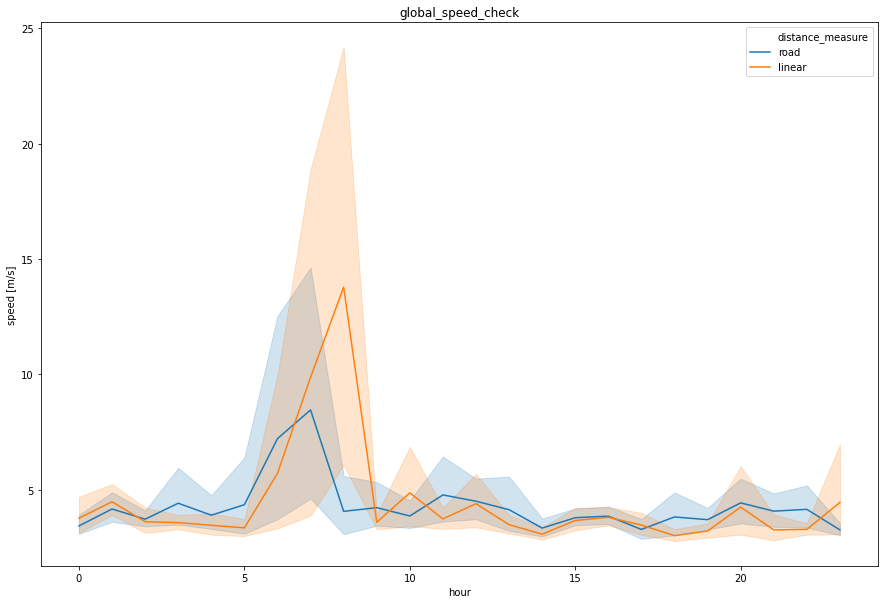

In [132]:
plt.figure(figsize=(15,10))
fig=sns.lineplot(x='started_at_hour', y='speed', hue='distance_measure', data=df_clean_new)
plt.title('global_speed_check')
fig.set(xlabel='hour', ylabel='speed [m/s]')

The graph confirms the test outcome: there is not a general tendency for the avg speed considering the `linear` or the `road` assignation methods.

## 3.2 Geographical check 

H1: in the city `<city_name>` the pickups assigned with the api query are significantly faster

In [133]:
filter4=df_clean_new['city_id']=='pentos'
filter5=df_clean_new['city_id']=='bravos'
filter6=df_clean_new['city_id']=='volantis'

pentos=df_clean_new[filter4]
pentos_road=pento[pento['distance_measure']=='road'].speed
pentos_linear=pento[pento['distance_measure']=='linear'].speed

bravos=df_clean_new[filter5]
bravos_road=bravo[bravo['distance_measure']=='road'].speed
bravos_linear=bravo[bravo['distance_measure']=='linear'].speed

volantis=df_clean_new[filter6]
volantis_road=volantis[volantis['distance_measure']=='road'].speed
volantis_linear=volantis[volantis['distance_measure']=='linear'].speed


In [134]:
res=stats.ttest_ind(pentos_road, pentos_linear)
checkPValue(res[1]/2)

'--> Null(H0) hypotesis rejected'

In [135]:
print('pvalue=',res[1]/2)

pvalue= 0.02708598668212496


In [136]:
res1=stats.ttest_ind(bravos_road, bravos_linear)
checkPValue(res1[1]/2)

'--> We cannot reject the null hypotesis'

In [137]:
print('pvalue=',res1[1]/2)

pvalue= 0.23708122452479613


In [138]:
res2=stats.ttest_ind(volantis_road, volantis_linear)
checkPValue(res2[1]/2)

'--> We cannot reject the null hypotesis'

In [139]:
print('pvalue=',res2[1]/2)

pvalue= 0.17509614896954873


According to the test **the p-value is larger than 5%**, the odds of quicker rides with road method assignment are due to chance in bravos and volantis, while are statistically significant in pentos.

[Text(0, 0.5, 'avg_speed [m/s]'), Text(0.5, 0, 'hour')]

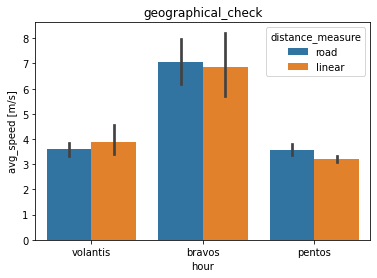

In [140]:
#df_clean_new.groupby('city_id').agg({'speed':'mean'}).plot.bar()
plt.figure(figsize=(6,4))
ax = sns.barplot(x="city_id", y="speed", hue="distance_measure", data=df_clean_new)
plt.title('geographical_check')
ax.set(xlabel='hour', ylabel='avg_speed [m/s]')

From the graph I can confirm that only pentos has a significantly better avg_speed using 'road' assignatin method.

In [141]:
#bravos
prova=df_clean_new[filter5]
prova[['speed','distance_measure','duration']].groupby('distance_measure').agg(avg_speed=('speed','mean'), duration=('duration','mean'))

,avg_speed,duration
distance_measure,,
linear,6.876481,552.222556
road,7.067793,548.512989


In [142]:
#pentos
prova2=df_clean_new[filter4]
prova2[['speed','distance_measure','duration']].groupby('distance_measure').agg(avg_speed=('speed','mean'), duration=('duration','mean'))

,avg_speed,duration
distance_measure,,
linear,3.200288,255.856518
road,3.552139,256.073926


## 3.3 Rush hours check [13-->20]

H1: during the rush hour the pickups assigned with the api query are significantly faster

In [143]:
filter7 = (df_clean_new['started_at_hour']>=13) & (df_clean_new['started_at_hour']<=20)
df_rush=df_clean_new[filter7]


In [144]:
filter4=df_rush['city_id']=='pentos'
filter5=df_rush['city_id']=='bravos'
filter6=df_rush['city_id']=='volantis'

pentos=df_rush[filter4]
pentos_road=pentos[pentos['distance_measure']=='road'].speed
pentos_linear=pentos[pentos['distance_measure']=='linear'].speed

bravos=df_rush[filter5]
bravos_road=bravos[bravos['distance_measure']=='road'].speed
bravos_linear=bravos[bravos['distance_measure']=='linear'].speed

volantis=df_rush[filter6]
volantis_road=volantis[volantis['distance_measure']=='road'].speed
volantis_linear=volantis[volantis['distance_measure']=='linear'].speed


In [145]:
res=stats.ttest_ind(pento_road, pento_linear)
checkPValue(res[1]/2)

'--> Null(H0) hypotesis rejected'

In [146]:
res=stats.ttest_ind(bravo_road, bravo_linear)
checkPValue(res[1]/2)

'--> We cannot reject the null hypotesis'

In [147]:
res=stats.ttest_ind(volantis_road, volantis_linear)
checkPValue(res[1]/2)

'--> We cannot reject the null hypotesis'

According to the test **the p-value is larger than 5%**, the odds of quicker rides with road method assignment are due to chance in bravos and volantis, while are statistically significant in pentos, even during the rush hours.

## 3.4 max price it would make sense to pay per query 

Avg duration time for a ride with 'road' pickup is ~ 812+293+94= 1199 second, while with linear methos is 1202. The avg difference is 3 seconds, not relevant enough to justify a payment per query.

In [189]:
filter3=df_clean_new['distance_measure']=='road'
df_clean_new[filter3].groupby('type').agg({'duration':'mean'})

,duration
type,
driving_to_destination,812.887982
going_to_pickup,293.348945
waiting_for_rider,94.525484


In [190]:
df_clean_new[~filter3].groupby('type').agg({'duration':'mean'})

,duration
type,
driving_to_destination,813.929619
going_to_pickup,294.927102
waiting_for_rider,95.459795


# Answers

`1.Should the company move towards road distance? What's the max price it would make sense to pay per query? (make all the assumptions you need, and make them explicit)`

- I would not recommend the company to move towards road distance, since the cost does not have a relevant ROI.
- The avg difference is 3 seconds, not relevant enough to justify a payment per query.


`2.How would you improve the experimental design? Would you collect any additional data?`

- I would collect more data (1 month time span), since 2 days are not enough to get a good hypothesis test result. In fact the outcome might be influenced by bias o some events happening in those days.

- I would collect the information of the 'linear' distance also for the taxi with the road pickup method assignement, in order to calculate the 'linear speed'= haversine_distance/distance, and  run the A/B test using this variable.
  
- In order to minimize the bias, I would divide the time available in 2 spans, and swap the two groups after the first span.

- Mrketing topic: I would  I would evaluate if the arrival predicted time is more precise using the road method. This would mean that I could predict exactly the time it takes for the pickup and to the destination  (becouse I weighting the distance with traffic situation) and use this as claim to gain consumers' reliability.